### 
In this notebook we will be doing some sentiment analysis in python using two different techniques:

1) VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2) Roberta Pretrained Model from 🤗
3) Huggingface Pipeline

Step 1) Reading data and NLTK basics

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

plt.style.use('ggplot')




In [12]:
# Reading data
df = pd.read_csv('Reviews.csv')

# Exploring data
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [13]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [14]:
df.shape


(568454, 10)

In [15]:
# taking a sample of 500 reviews
df500 = df.head(500)

# Exploring the sample
df500.head()
df500.shape


(500, 10)

## Quick EDA

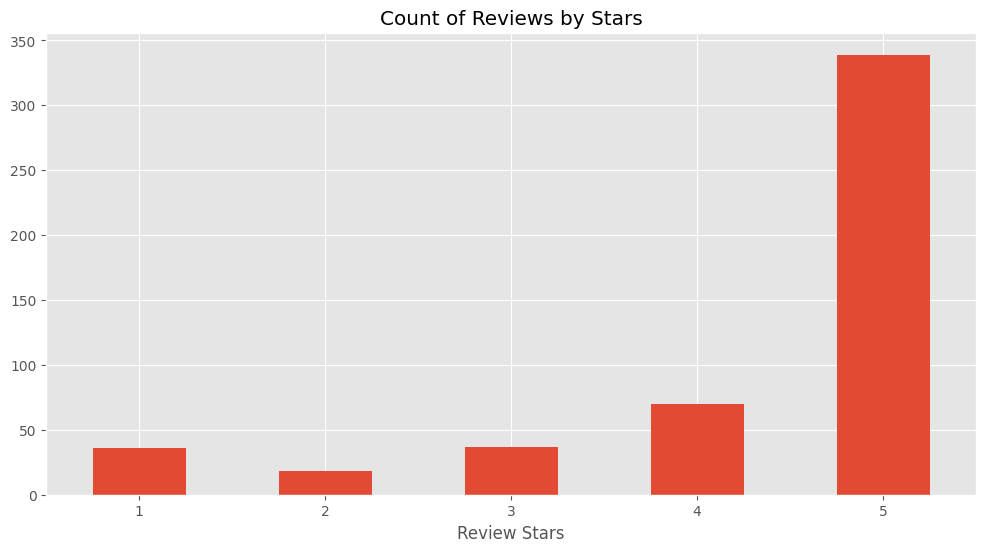

In [16]:
ax = df500['Score'].value_counts().sort_index() \
    .plot(kind='bar', 
          title='Count of Reviews by Stars', 
          figsize=(12,6))
ax.set_xlabel('Review Stars')
plt.xticks(rotation=0)
plt.show()


## Basic NLTK

In [17]:
example = df['Text'].values[50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [18]:
tokens = nltk.word_tokenize(example)


In [19]:
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [20]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Checkout\AppData\Roaming

True

In [21]:

tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [22]:
entities =  nltk.chunk.ne_chunk(tagged)
entities.pprint()


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


Step 2) VADER Seniment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

-This uses a "bag of words" approach:
    i) Stop words are removed
    ii) each word is scored and combined to a total score.

In [23]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()




In [24]:
sia.polarity_scores('I am so happy!')


{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [25]:
sia.polarity_scores('This is the worst thing ever.')


{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [26]:
sia.polarity_scores(example)


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [27]:
df500.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [28]:
# Run the polarity score on the dataset with 500 reviews
results = []
for row in df500['Text']:
    polar = sia.polarity_scores(row)
    polar['review'] = row
    results.append(polar)




In [29]:
results[:5]


[{'neg': 0.0,
  'neu': 0.695,
  'pos': 0.305,
  'compound': 0.9441,
  'review': 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'},
 {'neg': 0.138,
  'neu': 0.862,
  'pos': 0.0,
  'compound': -0.5664,
  'review': 'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'},
 {'neg': 0.091,
  'neu': 0.754,
  'pos': 0.155,
  'compound': 0.8265,
  'review': 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I high

In [30]:
pd.DataFrame(results)


,neg,neu,pos,compound,review
0,0.000,0.695,0.305,0.9441,I have bought several of the Vitality canned d...
1,0.138,0.862,0.000,-0.5664,Product arrived labeled as Jumbo Salted Peanut...
2,0.091,0.754,0.155,0.8265,This is a confection that has been around a fe...
3,0.000,1.000,0.000,0.0000,If you are looking for the secret ingredient i...
4,0.000,0.552,0.448,0.9468,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
495,0.000,0.554,0.446,0.9725,i rarely eat chips but i saw these and tried t...
496,0.059,0.799,0.142,0.7833,This is easily the best potato chip that I hav...
497,0.025,0.762,0.212,0.9848,Kettle Chips Spicy Thai potato chips have the ...
498,0.041,0.904,0.055,0.1280,"Okay, I should not eat potato chips, nor shoul..."


In [31]:
vaders = pd.DataFrame(results)
# Merge the VADER sentiment scores with the original df500 DataFrame
# Selecting just the sentiment columns from vaders and reordering columns
sentiment_columns = vaders[['neg', 'neu', 'pos', 'compound']]
vaders = pd.concat([sentiment_columns, df500], axis=1)


In [32]:
vaders.head(2)


,neg,neu,pos,compound,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0.000,0.695,0.305,0.9441,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0.138,0.862,0.000,-0.5664,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [33]:
# Reorder columns to move Id first
cols = vaders.columns.tolist()
cols = ['Id'] + [col for col in cols if col != 'Id']
vaders = vaders[cols]

In [34]:
# The new dataframe has the sentiment scores and the original review text
vaders.head(2)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


## Bar plot of vaders

C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\1401880286.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vaders, x='Score', y='compound', palette='viridis')


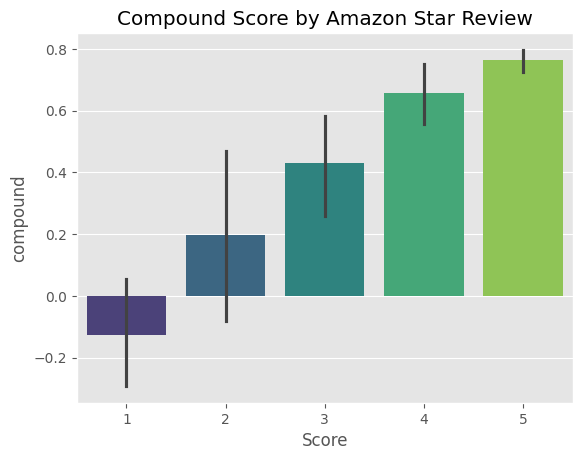

In [35]:
ax = sns.barplot(data=vaders, x='Score', y='compound', palette='viridis')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()


C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3357792633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3357792633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neu', ax=ax[1], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\3357792633.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x='Score', y='neg', ax=ax[2], palette='viridis')


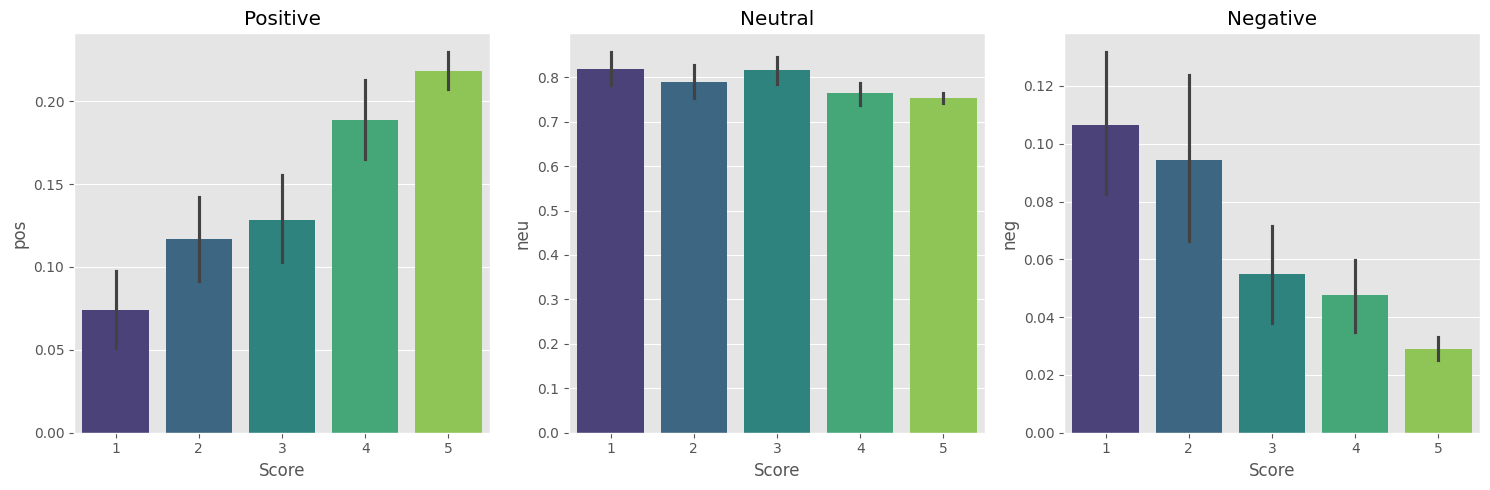

In [36]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0], palette='viridis')
sns.barplot(data=vaders, x='Score', y='neu', ax=ax[1], palette='viridis')
sns.barplot(data=vaders, x='Score', y='neg', ax=ax[2], palette='viridis')
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.tight_layout()
plt.show()


In [37]:
df.head(2)
df.shape

(568454, 10)

In [38]:
# doing the same for the entire dataset
df[['neg', 'neu', 'pos', 'compound']] = df['Text'].apply(lambda x: pd.Series(sia.polarity_scores(x)))


In [39]:
df.head(2)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664


In [40]:
df['Sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [41]:
df.head(2)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,negative


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      568454 non-null  int64  
 1   ProductId               568454 non-null  object 
 2   UserId                  568454 non-null  object 
 3   ProfileName             568428 non-null  object 
 4   HelpfulnessNumerator    568454 non-null  int64  
 5   HelpfulnessDenominator  568454 non-null  int64  
 6   Score                   568454 non-null  int64  
 7   Time                    568454 non-null  int64  
 8   Summary                 568427 non-null  object 
 9   Text                    568454 non-null  object 
 10  neg                     568454 non-null  float64
 11  neu                     568454 non-null  float64
 12  pos                     568454 non-null  float64
 13  compound                568454 non-null  float64
 14  Sentiment           

In [43]:
df['Sentiment'].value_counts()

Sentiment
positive    499083
negative     61406
neutral       7965
Name: count, dtype: int64

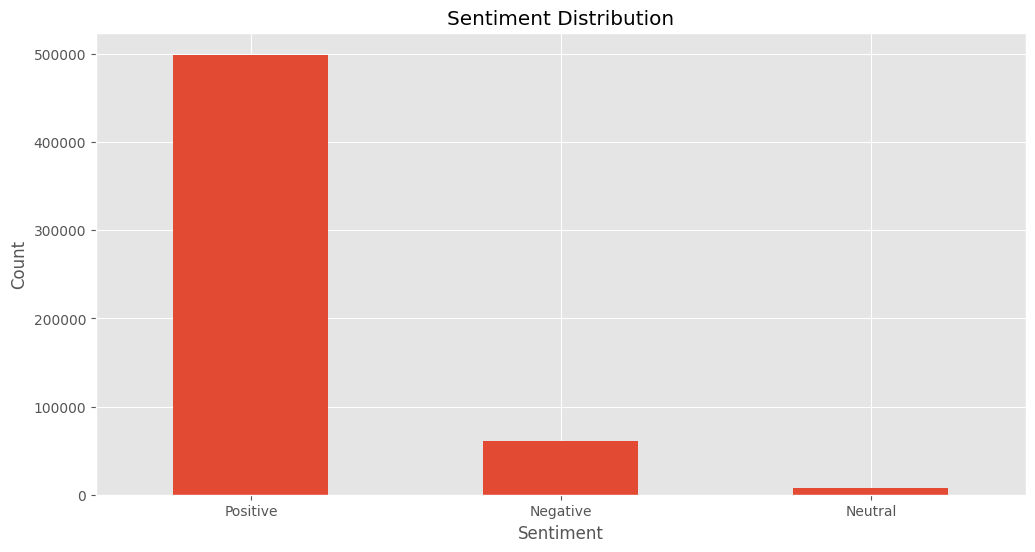

In [44]:
ax = df['Sentiment'].value_counts().plot(kind='bar', figsize=(12,6))
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
ax.set_title('Sentiment Distribution')
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'], rotation=0)
plt.show()




C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2017555403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Score', y='pos', ax=ax[0], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2017555403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Score', y='neu', ax=ax[1], palette='viridis')
C:\Users\Checkout\AppData\Local\Temp\ipykernel_10192\2017555403.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Score', y='neg', ax=ax[2], palette='viridis')


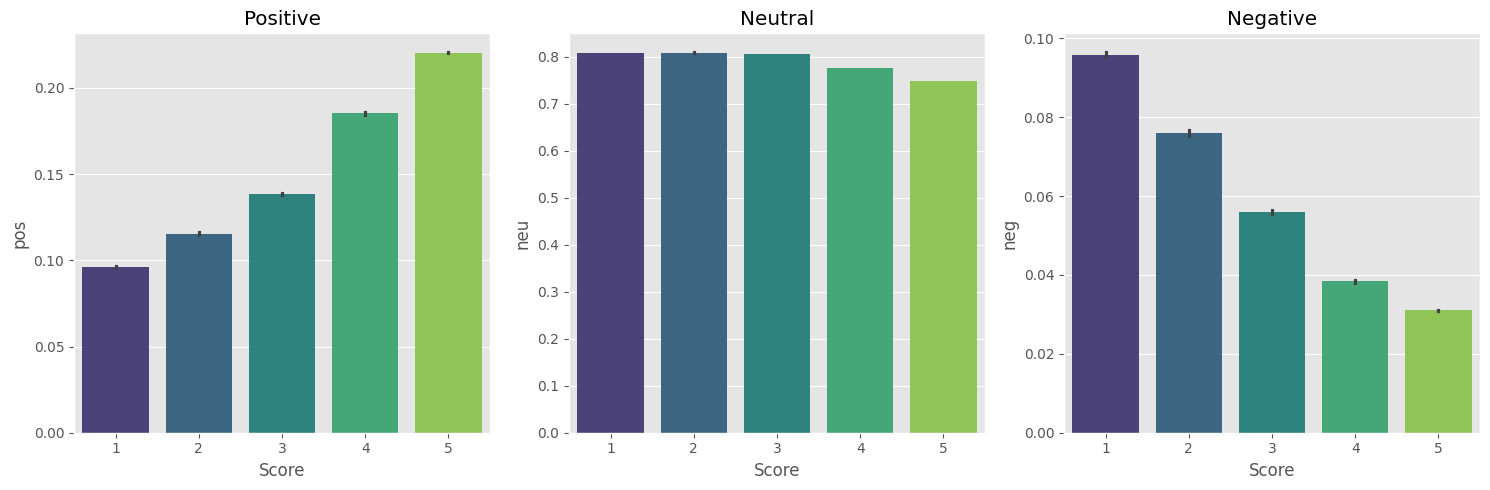

In [45]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=df, x='Score', y='pos', ax=ax[0], palette='viridis')
sns.barplot(data=df, x='Score', y='neu', ax=ax[1], palette='viridis')
sns.barplot(data=df, x='Score', y='neg', ax=ax[2], palette='viridis')
ax[0].set_title('Positive')
ax[1].set_title('Neutral')
ax[2].set_title('Negative')
plt.tight_layout()
plt.show()

Step 3) Roberta pre-trained model

In [46]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [47]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model  =  AutoModelForSequenceClassification.from_pretrained(model)

In [48]:
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."